dglからロードしたデータ（AmazonCoBuyComputerDataset）を確認、修正  
ネットワーク図のプロット

In [24]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
!ls -lh tmp/dgl

total 93112
-rw-r--r--@ 1 YShimada-MBP16  staff   5.1M Oct 16 15:35 AmazonCoBuyComputerDataset_edge_list.csv
-rw-r--r--@ 1 YShimada-MBP16  staff    40M Oct 16 15:35 AmazonCoBuyComputerDataset_node_features.csv
-rw-r--r--@ 1 YShimada-MBP16  staff    27K Oct 16 15:35 AmazonCoBuyComputerDataset_node_labels.csv


In [4]:
df_node_label = pd.read_csv('tmp/dgl/AmazonCoBuyComputerDataset_node_labels.csv')
print(df_node_label.shape)
df_node_label.head()

(13752, 1)


,label
0,8
1,8
2,1
3,8
4,4


In [10]:
df_node_label['label'].value_counts()

4    5158
8    2156
1    2142
2    1414
7     818
3     542
6     487
0     436
5     308
9     291
Name: label, dtype: int64

In [13]:
df_node_label['node_id'] = [i for i in range(df_node_label.shape[0])]
df_node_label = df_node_label[['node_id', 'label']]
df_node_label

,node_id,label
0,0,8
1,1,8
2,2,1
3,3,8
4,4,4
...,...,...
13747,13747,4
13748,13748,4
13749,13749,4
13750,13750,8


In [21]:
df_node_features = pd.read_csv('tmp/dgl/AmazonCoBuyComputerDataset_node_features.csv')
print(df_node_features.shape)
df_node_features.head()

(13752, 767)


,0,1,2,3,4,5,6,7,8,9,...,757,758,759,760,761,762,763,764,765,766
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


In [22]:
df_node_features2 = df_node_features.copy()
df_node_features = pd.DataFrame({'node_id':[i for i in range(df_node_label.shape[0])]})
df_node_features = pd.concat([df_node_features,df_node_features2], axis=1)
df_node_features

,node_id,0,1,2,3,4,5,6,7,8,...,757,758,759,760,761,762,763,764,765,766
0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13747,13747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13748,13748,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
13749,13749,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13750,13750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
df_node_features.describe()

,node_id,0,1,2,3,4,5,6,7,8,...,757,758,759,760,761,762,763,764,765,766
count,13752.000000,13752.000000,13752.000000,13752.00000,13752.000000,13752.000000,13752.000000,13752.000000,13752.000000,13752.000000,...,13752.000000,13752.000000,13752.000000,13752.000000,13752.000000,13752.000000,13752.000000,13752.000000,13752.000000,13752.000000
mean,6875.500000,0.319154,0.362056,0.23313,0.262871,0.428301,0.251891,0.564282,0.417248,0.415721,...,0.211097,0.206952,0.409540,0.426338,0.265343,0.340605,0.504727,0.243310,0.210806,0.357475
std,3970.004786,0.466166,0.480612,0.42284,0.440209,0.494851,0.434115,0.495869,0.493123,0.492864,...,0.408102,0.405135,0.491767,0.494562,0.441532,0.473930,0.499996,0.429096,0.407896,0.479274
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3437.750000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6875.500000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,10313.250000,1.000000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,13751.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
df_edge = pd.read_csv('tmp/dgl/AmazonCoBuyComputerDataset_edge_list.csv')
print(df_edge.shape)
df_edge.head()

(491722, 2)


,src,dst
0,1,0
1,2,0
2,3,0
3,0,1
4,2,1


In [26]:
df_edge['src'].nunique(), df_edge['dst'].nunique()

(13471, 13471)

In [27]:
df_edge.describe()

,src,dst
count,491722.000000,491722.000000
mean,8599.524416,8599.524416
std,3487.946531,3487.946531
min,0.000000,0.000000
25%,6439.000000,6439.000000
50%,9030.000000,9030.000000
75%,11577.000000,11577.000000
max,13470.000000,13470.000000


In [77]:
# 修正データを上書き保存
print(df_node_label.shape, df_node_features.shape, df_edge.shape)
df_node_label.to_csv('tmp/dgl/AmazonCoBuyComputerDataset_node_labels.csv', index=False)
df_node_features.to_csv('tmp/dgl/AmazonCoBuyComputerDataset_node_features.csv', index=False)
df_edge.to_csv('tmp/dgl/AmazonCoBuyComputerDataset_edge_list.csv', index=False)

(13752, 2) (13752, 768) (491722, 2)


## グラフ作成

ノード数が多く、分かりにくいので、df_edgeにidがあるノードにのみ絞り、サンプリング

In [71]:
df_edge_sample = df_edge.sample(n=3000)
df_edge_sample.shape

(3000, 2)

In [72]:
# 2. NetworkX グラフを作成
G = nx.from_pandas_edgelist(df_edge_sample, 'src', 'dst')
G

In [73]:
len(G.nodes)

3856

In [74]:
df_node_label_sample = df_node_label[df_node_label['node_id'].isin(G.nodes)]
df_node_label_sample

,node_id,label
32,32,4
35,35,4
36,36,4
53,53,8
54,54,8
...,...,...
13457,13457,6
13465,13465,8
13466,13466,8
13467,13467,8


In [75]:
# 3. ノードラベルと特徴量をグラフに追加
for _, row in df_node_label_sample.iterrows():
    G.nodes[row['node_id']]['label'] = row['label']

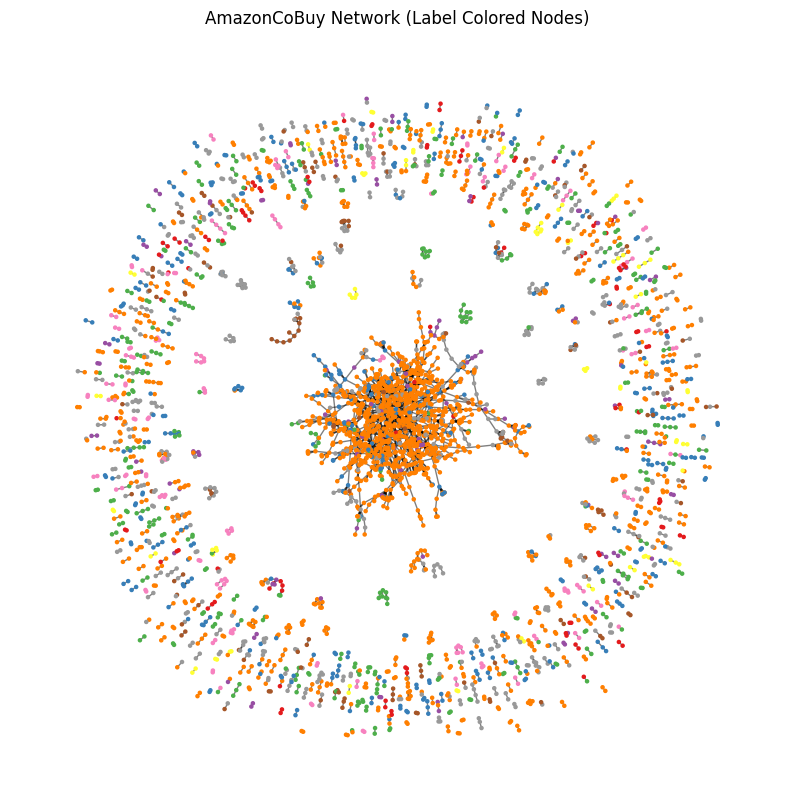

In [76]:
# 4. グラフをプロット
# ノードカラーをラベルで設定
node_colors = [G.nodes[n]['label'] for n in G.nodes]

# レイアウト設定 (spring_layout がよく使われる)
pos = nx.spring_layout(G, seed=42)  # レイアウトの再現性を保持するためにシードを指定

plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=plt.cm.Set1, node_size=5)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title("AmazonCoBuy Network (Label Colored Nodes)")
#plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.Set1), label="Node Labels")
plt.axis('off')
plt.show()

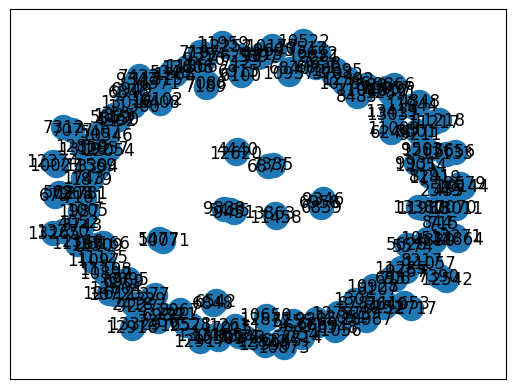

In [60]:
nx.draw_networkx(G)
plt.show()